https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [15]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
df_train = pd.read_csv('~/Desktop/train.csv')
df_test = pd.read_csv('~/Desktop/test.csv')

## 1. EDA

### 1. Provide appropriate descriptive statistics and visualizations to help understand the marginal distribution of the dependent variable.

In [6]:
# Descriptive Statistics of the dependent variable
df_train[['SalePrice']].describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


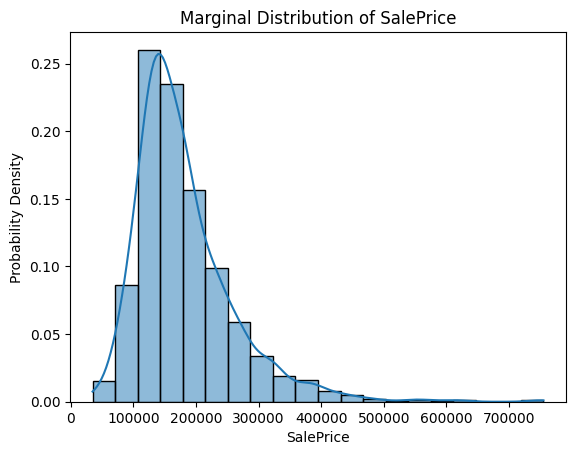

In [20]:
# Marginal Distribution of the dependent variable
sns.histplot(df_train['SalePrice'], kde = True, bins=20, stat='probability')
plt.title("Marginal Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Probability Density")
plt.show()

### 2. Investigate missing data and outliers.

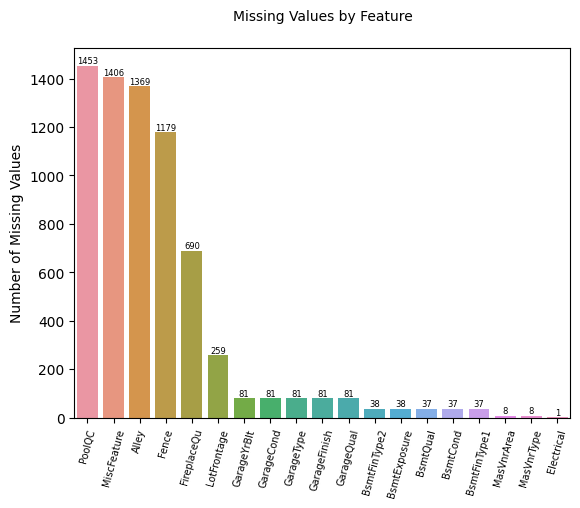

In [59]:
# Missing data
missing_data = pd.DataFrame({'Missing values':(df_train.isna().sum()).sort_values(ascending=False)})
missing_data = missing_data[missing_data['Missing values']> 0]
ax = sns.barplot(x = missing_data.index, y='Missing values', data = missing_data)
ax.bar_label(ax.containers[0], fontsize=6)
plt.title('Missing Values by Feature', pad=20, fontsize=10)
plt.ylabel('Number of Missing Values', fontsize=10)
plt.xticks(rotation=75, ha='center',fontsize=7)
plt.show()

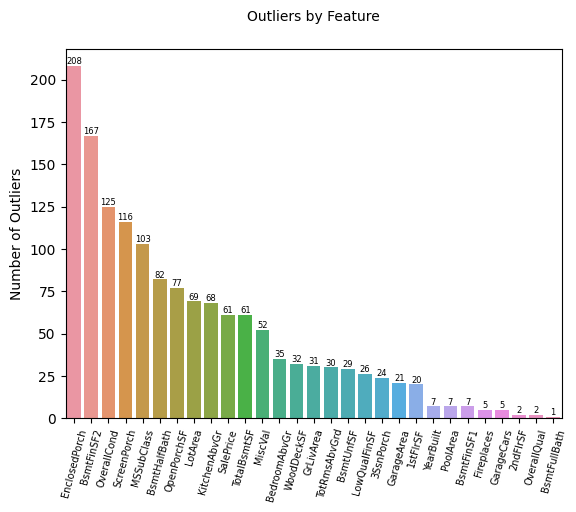

In [75]:
# Outliers
def find_outliers_iqr(data):
    """Find outliers in a dataset using the 1.5*IQR rule."""

    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    return outliers

outliers_data = pd.DataFrame({'Outliers':df_train.select_dtypes(include=np.number).apply(find_outliers_iqr).apply(len)})
outliers_data = outliers_data[outliers_data['Outliers']> 0].sort_values(by='Outliers',ascending=False)

ax = sns.barplot(x = outliers_data.index, y='Outliers', data = outliers_data)
ax.bar_label(ax.containers[0], fontsize=6)
plt.title('Outliers by Feature', pad=20, fontsize=10)
plt.ylabel('Number of Outliers', fontsize=10)
plt.xticks(rotation=75, ha='center',fontsize=7)
plt.show()

### 3. Investigate at least three potential predictors of the dependent variable and provide appropriate graphs / statistics to demonstrate the relationships.

In [82]:
# Corr matrix
abs(df_train.corr(numeric_only=True)['SalePrice']).sort_values(ascending=False).head(4)

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
Name: SalePrice, dtype: float64

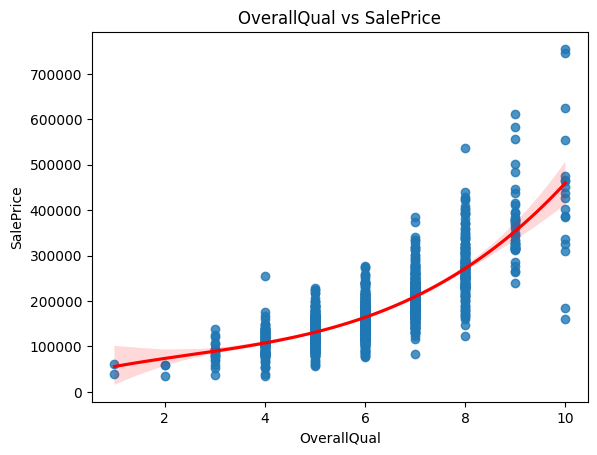

In [104]:
# OverallQual vs SalePrice
sns.regplot(data=df_train, x='OverallQual', y='SalePrice', line_kws={'color': 'r'}, order = 3)
plt.title('OverallQual vs SalePrice')
plt.show()

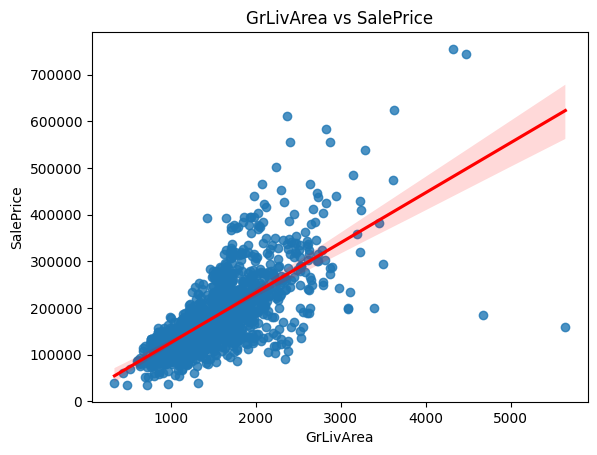

In [107]:
# GrLivArea vs SalePrice
sns.regplot(data=df_train, x='GrLivArea', y='SalePrice', line_kws={'color': 'r'})
plt.title('GrLivArea vs SalePrice')
plt.show()

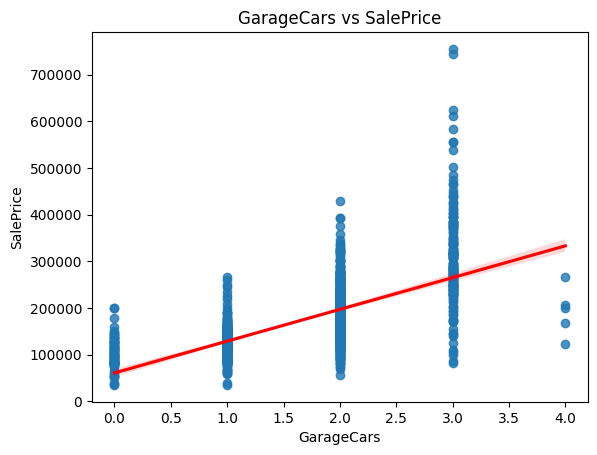

In [110]:
# GarageCars vs SalePrice
sns.regplot(data=df_train, x='GarageCars', y='SalePrice', line_kws={'color': 'r'})
plt.title('GarageCars vs SalePrice')
plt.show()

### 4. Engage in feature creation by splitting, merging, or otherwise generating a new predictor.

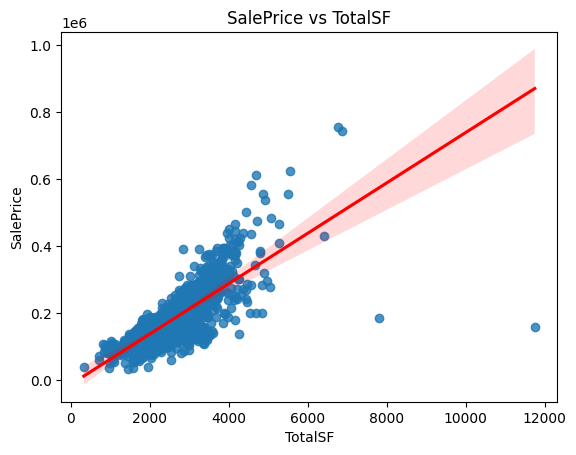

In [111]:
# Creat new feature TotalSF
df_train['TotalSF'] = df_train['GrLivArea'] + df_train['TotalBsmtSF']

# Visualize the relationship between TotalSF and SalePrice
sns.regplot(data = df_train, x='TotalSF', y='SalePrice', line_kws={'color': 'r'})
plt.title("SalePrice vs TotalSF")
plt.show()

### 5. Using the dependent variable, perform both min-max and standard scaling in Python.

In [131]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()
minmax = mm_scaler.fit_transform(df_train[['SalePrice']]).flatten()


In [132]:
from sklearn.preprocessing import StandardScaler
sd_scaler = StandardScaler()
standard = sd_scaler.fit_transform(df_train[['SalePrice']]).flatten()

In [133]:
scaler_data = pd.DataFrame({
    'SalePrice':df_train['SalePrice'],
    'Minmax':minmax,
    'Standard':standard
})

scaler_data

,SalePrice,Minmax,Standard
0,208500,0.241078,0.347273
1,181500,0.203583,0.007288
2,223500,0.261908,0.536154
3,140000,0.145952,-0.515281
4,250000,0.298709,0.869843
...,...,...,...
1455,175000,0.194556,-0.074560
1456,210000,0.243161,0.366161
1457,266500,0.321622,1.077611
1458,142125,0.148903,-0.488523
